<a href="https://colab.research.google.com/github/umairkhan1154/CNN-deeplearning/blob/master/CNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [0]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


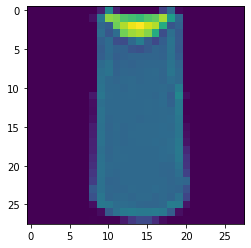

In [0]:
plt.imshow(train_images[2])


In [0]:
#checking the shapes of dataset
print("train_images.shape",train_images.shape)
print("test_images.shape",test_images.shape)
print("train_labels.shape",train_labels.shape)
print("train_labels.shape",test_labels.shape)

train_images.shape (60000, 28, 28)
test_images.shape (10000, 28, 28)
train_labels.shape (60000,)
train_labels.shape (10000,)


In [0]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
train_labels[4]


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
print(tf.__version__)

2.2.0


In [0]:
model = models.Sequential()

#adding first convet layer
model.add(layers.Conv2D(32 , (3,3),activation="relu",input_shape=(28,28,1)))
#adding max pooling layer
model.add(layers.MaxPooling2D((2,2)))


#adding SECOND convet layer
model.add(layers.Conv2D(64 , (3,3),activation="relu"))
#adding max pooling layer
model.add(layers.MaxPooling2D((2,2)))


#adding third convet layer
model.add(layers.Conv2D(64 , (3,3),activation="relu"))

#adding flatten layer to convert filter images into 1D
model.add(layers.Flatten())

#adding dense layer before the output layer
model.add(layers.Dense(64,activation = "relu"))

#output layer
model.add(layers.Dense(10,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [0]:
#reshape the train images 
train_images = train_images.reshape((60000,28,28,1))

#normaliz the train images
train_images = train_images.astype('float32')/255

#reshape the test images 
test_images = test_images.reshape((10000,28,28,1))

#normaliz the test images
test_images = test_images.astype('float32')/255



In [0]:
#compiling the model
model.compile(optimizer="adam",loss = "categorical_crossentropy",metrics=['accuracy'])

#fitting in the cnn model
model.fit(train_images,train_labels , epochs = 5, batch_size = 64)


Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 0.5517 - accuracy: 0.7983
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3564 - accuracy: 0.8707
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3057 - accuracy: 0.8881
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.2705 - accuracy: 0.8999
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.2478 - accuracy: 0.9081


In [0]:
test_loss ,test_acc = model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2730 - accuracy: 0.8996
